# Python Matplotlib Subplots with Color Lines

## Dependencies

In [1]:
# matplotlib line collection to mark segments
from matplotlib.collections import LineCollection
# matplotlib plotter
import matplotlib.pyplot as plt
# numpy
import numpy as np

## The Color Line

A line in 3D can be projected to the 2D XY-plane by marking the Z-axis data as color intensities.

In [2]:
def plot_color_line(axis, xs, ys, zs, cmap='Reds'):
    """Function to plot the line.

    Parameters
    ----------
    axis : :class:`matplotlib.axes.Axis`
        Axis of the current plot.
    xs : list
        X-axis values.
    ys : list
        Y-axis values.
    zs : list
        Z-axis values.
    cmap : str, optional
        Matplotlib color map. Default is "Reds".
    
    Returns
    -------
    line : :class:`matplotlib.collections.LineCollection`
        Matplotlib line collection.
    """

    # validate parameters
    # supported color maps
    supported_cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
    # default to "Reds" color map if not supported
    if cmap not in supported_cmaps:
        cmap = 'Reds'

    # list of points as x and y values
    _points = np.array([xs, ys]).transpose().reshape(-1, 1, 2)
    # segments concatenating consecutive points
    _segments = np.concatenate([_points[:-1], _points[1:]], axis=1)
    
    # line collection for the segments
    line_coll = LineCollection(_segments, cmap=cmap)
    line_coll.set_array(np.array(zs))
    # line concatenating the collection
    line = axis.add_collection(line_coll)

    # scatter plot
    axis.scatter(xs, ys, c=zs, cmap=cmap)

    return line

## Formatting the Data

Next, we format the data loaded from a .txt file.

In [3]:
def get_data_3D(filename, columns=[0, 1, 2], data_type='float_'):
    """Function to extract the data from a file.

    Parameters
    ----------
    filename : str
        Relative path of the file.
    columns : list, optional
        Index of the columns for the X, Y and Z axes. Default is `[0, 1, 2]`.
    data_type : str, optional
        Numpy data type of the values. Default is `float_`.
    
    Returns
    -------
    data : list
        Lists of X-axis, Y-axis and Z-axis values.
    """

    # validate parameters
    # supported data type
    supported_numpy_datatypes = ['bool_', 'int_', 'intc', 'intp', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16', 'uint32', 'uint64', 'float_', 'float16', 'float32', 'float64', 'complex_', 'complex64', 'complex128']
    if data_type not in supported_numpy_datatypes:
        data_type = 'float_'
    # chech whether all entries are integers
    assert len(columns) == 3 and sum([1 if type(col) is int else 0 for col in columns]) == 3, 'Parameter "columns" should contain 3 integers for column indices'

    # initialize list
    data = [list(), list(), list()]

    # open file and read all lines
    with open(filename) as data_file:
        lines = data_file.readlines()
    # extract data from each row
    for l in lines:
        # skip headers
        if l[0].isalpha() or l[0] == '\n':
            continue
        # split columns for each point
        point = l.split()

        # extract required columns
        axis = 0
        for col in columns:
            data[axis].append(getattr(np, data_type)(point[col]))
            axis += 1

    return data

In [4]:
# number of axes
n_axes = 2
# number of data files per axis
n_data_files = [3, 2]
# list of columns in each data file
# assuming files are of different structure
# should match the number of data files
col_data = [
    [[0, 1, 6], [0, 1, 5], [0, 1, 3]],
    [[0, 1, 3], [0, 1, 4]]
]
# colormap for each plot
# assuming different lines have different colors
# should match the number of data files
cmap_data = [
    ['Blues', 'Reds', 'Pastel1'],
    ['Purples', 'Greens']
]
# relative path and prefix of the filename
filename_prefix = 'python-matplotlib-subplot-color-line_data/data_'

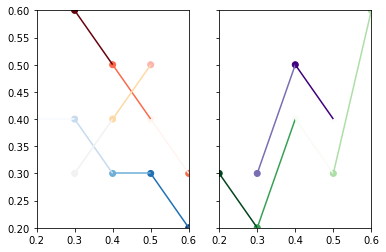

In [6]:
# initialize figure
fig, axes = plt.subplots(1, 2, sharey=True)

# initialize lists
# assuming X and Y axis data range from 0 to 1 here
min_x = 1
max_x = 0
min_y = 1
max_y = 0
# iteratively plot
for i in range(n_axes):
    axis = axes[i]
    # first axis
    for j in range(n_data_files[i]):
        # get data points
        xs, ys, zs = get_data_3D(filename_prefix + str(i) + '_' + str(j) + '.txt', col_data[i][j], 'float_')
        # plot color line
        plot_color_line(axis, xs, ys, zs, cmap_data[i][j])
        # update minimum and maximum values
        min_x = np.min([min_x, np.min(xs)])
        max_x = np.max([max_x, np.max(xs)])
        min_y = np.min([min_y, np.min(ys)])
        max_y = np.max([max_y, np.max(ys)])

    # update axes
    axis.set_xlim(min_x, max_x)
    axis.set_ylim(min_y, max_y)

# # make the subplots adjacent
# fig.subplots_adjust(wspace=0, hspace=0)
# show figure
plt.show()